#Предсказание аналитического вида нейросетевого обменно-корреляционного потенциала с помощью нейросети

Ссылка на источник используемой нейросети https://github.com/facebookresearch/symbolicregression

В данном ноутбуке решается задача символьной регрессии для предсказания аналитического вида уравнений для обменно-корреляционного потенциала LDA, сгенерированного нейросетью из работы https://github.com/ml-electron-project/NNfunctional/tree/master. Данные, с которыми мы работали, были сгенерированы в ноутбуке "Генерация нейросетевого потенциала"


Установка окружения Conda

In [1]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2023.07-1-Linux-x86_64.sh
!chmod +x Anaconda3-2023.07-1-Linux-x86_64.sh
!bash ./Anaconda3-2023.07-1-Linux-x86_64.sh -b -f -p /usr/local

--2023-07-27 13:20:04--  https://repo.anaconda.com/archive/Anaconda3-2023.07-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1059513078 (1010M) [application/x-sh]
Saving to: ‘Anaconda3-2023.07-1-Linux-x86_64.sh’

Anaconda3-2023.07-1 100%[===================>]   1010M  93.0MB/s    in 8.1s    

2023-07-27 13:20:12 (124 MB/s) - ‘Anaconda3-2023.07-1-Linux-x86_64.sh’ saved [1059513078/1059513078]

PREFIX=/usr/local
Unpacking payload ...
                                                                                               
Installing base environment...





Preparing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

Устанавливаем виртуальное окружение

In [2]:
!pip install --upgrade virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.5.2
    Uninstalling platformdirs-2.5.2:
      Successfully uninstalled platformdirs-2.5.2
  Attempting uninstall: filelock
    Found existing installation: filelock 3.9.0
    Uninstalling filelock-3.9.0:
      Successfully uninstalled filelock-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.3 requires pyqt5<5.16, which is not installed.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.


Создаем виртуальное окружение в Conda из .yml файла в репозитории проекта

In [3]:
!git clone https://github.com/facebookresearch/symbolicregression.git

!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init
!conda install -n root _license -y -q

!conda env create --name symbolic --file=/content/symbolicregression/environment.yml

Cloning into 'symbolicregression'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 2), reused 46 (delta 2), pack-reused 0
Receiving objects: 100% (46/46), 98.46 KiB | 725.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.7.22          |  py311h06a4308_0         154 KB
    conda-23.7.1               |  py311h06a4308_0         1.3 MB
    datashader-0.15.1          |  py311h06a4308_0        16.9 MB
    nltk-3.8.1                 |  py311h06a4308_0         2.8 MB
    panel-1.1.1                |  py311h06a4308_0        14.6 MB
    pyopenssl-23.2.0           |  py311h06a4308_0         12

Проверяем, что окружение установилось

In [4]:
!conda env list

# conda environments:
#
base                     /usr/local
symbolic                 /usr/local/envs/symbolic



Активируем созданное окружение

In [5]:
%%bash
source activate symbolic

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

['', '/env/python', '/usr/local/envs/symbolic/lib/python37.zip', '/usr/local/envs/symbolic/lib/python3.7', '/usr/local/envs/symbolic/lib/python3.7/lib-dynload', '/usr/local/envs/symbolic/lib/python3.7/site-packages', '/usr/local/lib/python3.6/site-packages']
Python version
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) 
[GCC 9.4.0]


Устанавливаем пакеты git и pip

In [6]:
!conda install -y git pip

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

Устанавливаем программный пакет sympytorch

In [7]:
!git clone https://github.com/pakamienny/sympytorch

%cd /content/sympytorch
!python setup.py install
%cd ../

Cloning into 'sympytorch'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 179 (delta 3), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (179/179), 36.76 KiB | 752.00 KiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/sympytorch
running install
/usr/local/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/site-packages/s

Переместим папки для корректного импорта модуля symbolicregression

In [8]:
%mv /content/symbolicregression /content/symbolicregression_0
%mv /content/symbolicregression_0/symbolicregression /content/symbolicregression

Наконец, запустим код</br>
Сначала импортируем необходимые модули

In [9]:
import torch
import scipy
import numpy as np
import pandas as pd
import sympy as sp
import os, sys
import symbolicregression
import requests
from IPython.display import display
from sympy import lambdify
from sympy.abc import a
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import random


torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

Загрузим предобученную модель

In [10]:
model_path = "model.pt"
try:
    if not os.path.isfile(model_path):
        url = "https://dl.fbaipublicfiles.com/symbolicregression/model1.pt"
        r = requests.get(url, allow_redirects=True)
        open(model_path, 'wb').write(r.content)
    if not torch.cuda.is_available():
        model = torch.load(model_path, map_location=torch.device('cpu'))
    else:
        model = torch.load(model_path)
        model = model.cuda()
    print(model.device)
    print("Model successfully loaded!")

except Exception as e:
    print("ERROR: model not loaded! path was: {}".format(model_path))
    print(e)

cuda:0
Model successfully loaded!


Инициализируем нейросеть-трансформер

In [11]:
est = symbolicregression.model.SymbolicTransformerRegressor(
                        model=model,
                        max_input_points=100000,
                        n_trees_to_refine=100,
                        rescale=True
                        )

Сделаем функцию, которая на вход будет принимать таблицу с набором точек, а на выходе выводить вид выражения, а также качество предсказания символьной регрессии (для функций с одной переменной обменно-корреляционного потенциала LDA):

In [12]:
def symbolic_regression_one_variable(table, table_test):
  x = (table['x_0'].values.reshape(len(table), 1))
  y = table['y'].values.reshape(len(table), 1)
  est.fit(x,y)
  replace_ops = {"add": "+", "mul": "*", "sub": "-", "pow": "**", "inv": "1/"}
  model_str = est.retrieve_tree(with_infos=True)["relabed_predicted_tree"].infix()
  for op,replace_op in replace_ops.items():
      model_str = model_str.replace(op,replace_op)
  display(sp.parse_expr(model_str))
  print()

  expression = sp.parse_expr(model_str.replace('x_0', 'a'))

  f = lambdify(a, expression, "numpy")

  coefficient_of_dermination = r2_score(y, f(x))
  rmse = mean_squared_error(y, f(x))**0.5
  print(f'Coefficient of dermination train = {coefficient_of_dermination}')
  print(f'RMSE train = {rmse}')
  print()

  #test
  x_test = (table_test['x_0'].values.reshape(len(table_test), 1))
  y_test = table_test['y'].values.reshape(len(table_test), 1)

  rmse_test = mean_squared_error(y_test, f(x_test))
  coefficient_of_dermination_test = r2_score(y_test, f(x_test))
  print(f'Coefficient of dermination test = {coefficient_of_dermination_test}')
  print(f'RMSE test = {rmse_test}')

  plt.scatter(y, f(x), c='r', label='Train')
  plt.scatter(y_test, f(x_test), label='Test')
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
  plt.legend()
  plt.show()

Эксперимент с "помощью" исходному трансформеру - берем степень 1/3 от значения исходного аргумента. Это сделано потому, что используемая нейросеть не может возводить числа в дробную степень (за исключением квадратного корня)

In [13]:
def symbolic_regression_one_variable_with_help(table, table_test):
  x = (table['x_0'].values.reshape(len(table), 1))**(1/3)
  y = table['y'].values.reshape(len(table), 1)
  est.fit(x,y)
  replace_ops = {"add": "+", "mul": "*", "sub": "-", "pow": "**", "inv": "1/"}
  model_str = est.retrieve_tree(with_infos=True)["relabed_predicted_tree"].infix()
  for op,replace_op in replace_ops.items():
      model_str = model_str.replace(op,replace_op)
  display(sp.parse_expr(model_str))
  print()

  expression = sp.parse_expr(model_str.replace('x_0', 'a'))

  f = lambdify(a, expression, "numpy")

  coefficient_of_dermination = r2_score(y, f(x))
  rmse = mean_squared_error(y, f(x))**0.5
  print(f'Coefficient of dermination train = {coefficient_of_dermination}')
  print(f'RMSE train = {rmse}')
  print()

  #test
  x_test = (table_test['x_0'].values.reshape(len(table_test), 1))**(1/3)
  y_test = table_test['y'].values.reshape(len(table_test), 1)

  rmse_test = mean_squared_error(y_test, f(x_test))
  coefficient_of_dermination_test = r2_score(y_test, f(x_test))
  print(f'Coefficient of dermination test = {coefficient_of_dermination_test}')
  print(f'RMSE test = {rmse_test}')

  plt.scatter(y, f(x), c='r', label='Train')
  plt.scatter(y_test, f(x_test), label='Test')
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
  plt.legend()
  plt.show()

Загрузим используемый датасет - он был сгенерирован нейросетью https://github.com/ml-electron-project/NNfunctional/tree/master. Возьмем первые 10000 точек, половину на обучение, а оставшуюся половину на тест

In [118]:
df = pd.read_csv('/content/NN_functional.csv')
table_init = df.copy()

table = table_init[0:5000]
table_test = table_init[5000:10000]

Проведем эксперимент с "помощью" модели (то есть с ручным возведением аргумента в степень 1/3). В качестве оценки эффективности модели мы использовали такие метрики как коэффициент детерминации и RMSE между значениями, полученными пакетом pyscf и значениями, полученными с помощью сгенерированной формулы

(-18.95492114884603*x_0 - 0.2756751490266733)*(0.00089503045683555174*x_0 + 0.03917430056756346)


Coefficient of dermination train = 0.9999377113109914
RMSE train = 0.01393876322757786

Coefficient of dermination test = 0.9912290815310093
RMSE test = 0.00032625582578891626


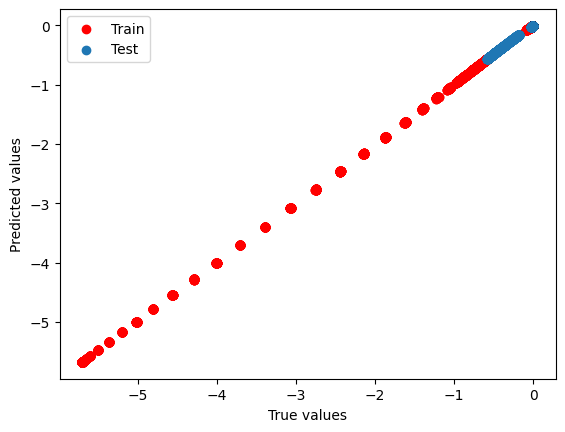

In [119]:
symbolic_regression_one_variable_with_help(table, table_test)

И эксперимент с абсолютным значением аргумента

-0.04*Abs(0.3444904327334199*x_0 - 36.6*cos(3.0 + 4.424182065485526*exp(-0.1010505269351365*x_0)) + 16.380757814152068) - 0.002


Coefficient of dermination train = 0.9606641833731462
RMSE train = 0.3502787015399268

Coefficient of dermination test = -1.1137292630774227
RMSE test = 0.07862534450156383


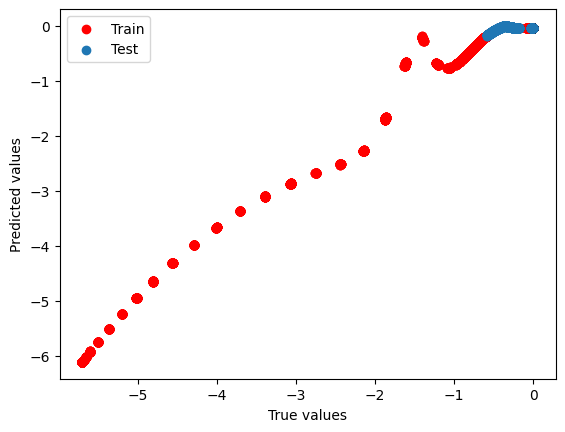

In [120]:
symbolic_regression_one_variable(table, table_test)